In [1]:
##Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [51]:
##Importing data into python
dataHouse = pd.read_csv("C:/Users/kulka/AnacondaJunior/HW1/house_prices.csv") 
dataHouse.fillna(dataHouse.mean(), inplace=True)
dataHouse.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,151.96765,1964.684217,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00000,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00000,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,151.96765,1964.684217,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00000,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
##Getting data table to get simplified statistics measurments
DataDescribe = dataHouse.describe()
DataDescribe

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.960433,3990.669241,392.002962,28.972246,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,122.000000,1960.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,151.967650,1964.684217,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,151.967650,1975.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [4]:
#correlation between different variables
dataHouse.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.407843,0.025678,0.091373,-0.052112,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238637,0.037507,0.069570,-0.262144,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262074,0.025004,0.073990,0.193183,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050201,0.024558,0.040714,0.025406,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.404721,0.025646,0.089102,-0.041894,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.321788,0.037130,0.084462,0.120910,-0.070594,0.118971,-0.052201
Car,0.407843,0.238637,0.262074,0.050201,0.404721,0.321788,1.000000,0.026759,0.068389,0.078563,-0.001961,0.063304,-0.024255
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026759,1.000000,0.094659,0.007052,0.009695,0.010833,-0.006854
BuildingArea,0.091373,0.069570,0.073990,0.040714,0.089102,0.084462,0.068389,0.094659,1.000000,0.003155,0.031799,-0.017441,-0.020736
YearBuilt,-0.052112,-0.262144,0.193183,0.025406,-0.041894,0.120910,0.078563,0.007052,0.003155,1.000000,0.046938,-0.002672,0.004909


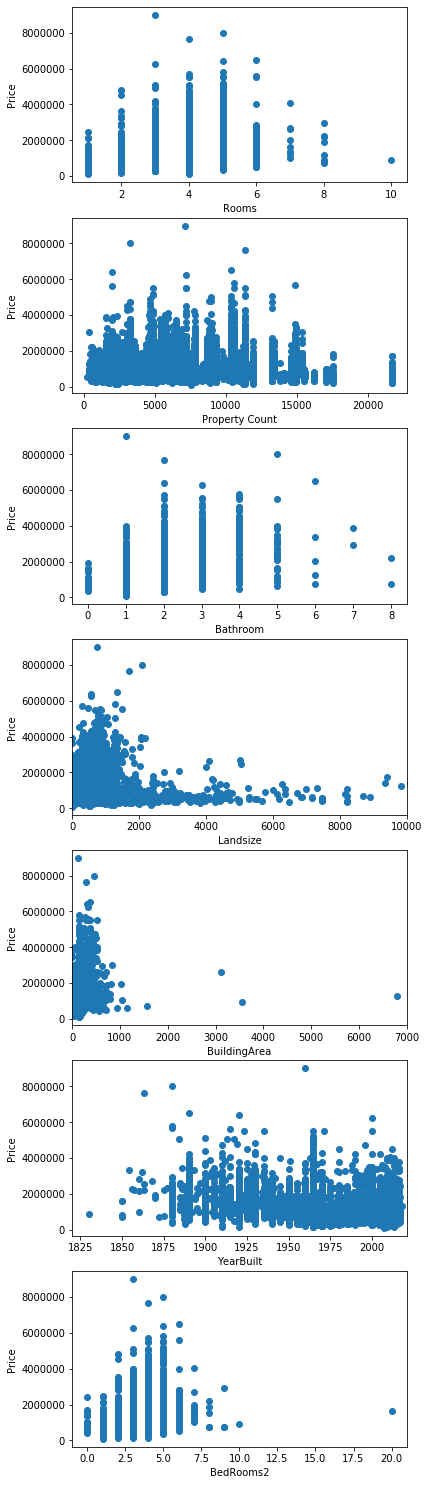

In [5]:
##Graphing possible different variables(x) against price (y) to see effects on price 
x1=dataHouse.iloc[:,[2]]
y1=y2=y3=y4=y5=y6=y7=dataHouse.iloc[:,[4]]
x2=dataHouse.iloc[:,[20]]
x3=dataHouse.iloc[:,[11]]
x4=dataHouse.iloc[:,[13]]
x5=dataHouse.iloc[:,[14]]
x6=dataHouse.iloc[:,[15]]
x7=dataHouse.iloc[:,[10]]

plt.subplot(7,1,1)
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.scatter(x1,y1)

plt.subplot(7,1,2)
plt.scatter(x2,y2)
plt.xlabel('Property Count')
plt.ylabel('Price')

plt.subplot(7,1,3)
plt.scatter(x3,y3)
plt.xlabel('Bathroom')
plt.ylabel('Price')

ax = plt.subplot(7,1,4)
plt.scatter(x4,y4)
plt.xlabel('Landsize')
plt.ylabel('Price')
ax.set_xlim(0,10000)

ax = plt.subplot(7,1,5)
plt.scatter(x5,y5)
plt.xlabel('BuildingArea')
plt.ylabel('Price')
ax.set_xlim(0,7000)

ax = plt.subplot(7,1,6)
plt.scatter(x6,y6)
plt.xlabel('YearBuilt')
plt.ylabel('Price')
ax.set_xlim(1820,2021)

ax = plt.subplot(7,1,7)
plt.scatter(x7,y7)
plt.xlabel('BedRoom2')
plt.ylabel('Price')


plt.subplots_adjust(left=None, bottom=2, right=None, top=7, wspace=2, hspace=None)

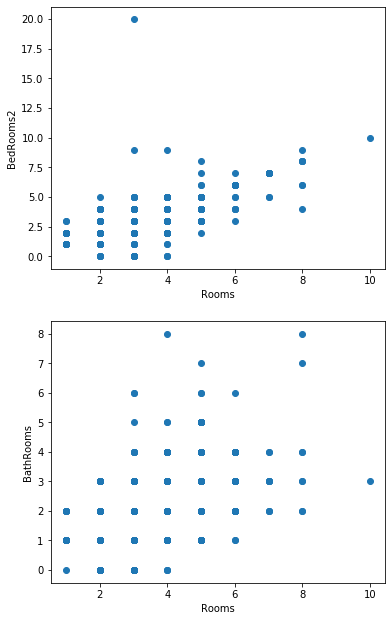

In [6]:
##Comparing Rooms against BedRooms to see correlation

x1=dataHouse.iloc[:,[2]]
y1=dataHouse.iloc[:,[10]]
ax = plt.subplot(2,1,1)
plt.xlabel('Rooms')
plt.ylabel('BedRoom2')
RvB=plt.scatter(x1,y1)

#Comparing Rooms vs BathRoom

x2=dataHouse.iloc[:,[2]]
y2=dataHouse.iloc[:,[11]]
ax2 = plt.subplot(2,1,2)
plt.xlabel('Rooms')
plt.ylabel('BathRoom')
YvL=plt.scatter(x2,y2)

plt.subplots_adjust(left=None, bottom=2, right=None, top=4, wspace=None, hspace=None)


In [33]:
##Creating a linear regression model too see relation between Rooms and BedRooms
##Creating a linear regression model too see relation between Rooms and bathRooms 
#Output is in terms of y=mx+b with 'y' and 'x' substituted for variables

lr_ax=LinearRegression()
lr_ax.fit(x1,y1)
(lr_ax.coef_)
(lr_ax.intercept_)
print("(BedRoom2)=", +lr_ax.coef_ ,"(Rooms) +", + lr_ax.intercept_)


lr_ax=LinearRegression()
lr_ax.fit(x2,y2)
(lr_ax.coef_)
(lr_ax.intercept_)
print("(BathRoom)=", +lr_ax.coef_ ,"(Rooms) +", + lr_ax.intercept_)

(BedRoom2)= [[0.95424038]] (Rooms) + [0.11117213]
(BathRoom)= [[0.42912931]] (Rooms) + [0.27346088]


In [49]:
#Linear Regression equation between Rooms and Bathroom vs Price + Prediction to see cost at differnet values

mlr_ax=LinearRegression()
mlr_ax.fit(dataHouse[['Rooms','Bathroom']], dataHouse['Price'])
print(mlr_ax.coef_)
print(mlr_ax.intercept_)

[226650.93671457 245970.16604137]
32406.650698838523


In [50]:
#Prediction between Rooms and Bathroom vs Price to see cost at differnet values
print(mlr_ax.predict([[2,2]]))

[977648.85621071]


#The relationship between Rooms&Bathroom vs price is the best indicator of the overall cost of the house due to the strong correlation amongst all three variables